# Introduction to data exploration mainly using Pandas

In [1]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Pandas dataframe and series

The first step will be to open a CSV file which contain some information about some voting count of a referendum in France.

In [2]:
filename_referendum = os.path.join('data', 'referendum.csv')
filename_referendum

'data/referendum.csv'

The data are not separated with a comma but a semi-colummn.

In [3]:
df = pd.read_csv(filename_referendum, sep=';')

In [4]:
df.head()

,Department code,Department name,Town code,Town name,Registered,Abstentions,Null,Choice A,Choice B
0,1,AIN,1,L'Abergement-Clémenciat,592,84,9,154,345
1,1,AIN,2,L'Abergement-de-Varey,215,36,5,66,108
2,1,AIN,4,Ambérieu-en-Bugey,8205,1698,126,2717,3664
3,1,AIN,5,Ambérieux-en-Dombes,1152,170,18,280,684
4,1,AIN,6,Ambléon,105,17,1,35,52


In [5]:
df.tail()

,Department code,Department name,Town code,Town name,Registered,Abstentions,Null,Choice A,Choice B
36786,ZZ,FRANCAIS DE L'ETRANGER,7,Europe centrale,89643,54981,318,17055,17289
36787,ZZ,FRANCAIS DE L'ETRANGER,8,"Europe du Sud, Turquie, Israël",109763,84466,292,9299,15706
36788,ZZ,FRANCAIS DE L'ETRANGER,9,Afrique Nord-Ouest,98997,59887,321,22116,16673
36789,ZZ,FRANCAIS DE L'ETRANGER,10,"Afrique Centre, Sud et Est",89859,46782,566,17008,25503
36790,ZZ,FRANCAIS DE L'ETRANGER,11,"Europe de l'est, Asie, Océanie",80061,42911,488,13975,22687


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 9 columns):
Department code    36791 non-null object
Department name    36791 non-null object
Town code          36791 non-null int64
Town name          36791 non-null object
Registered         36791 non-null int64
Abstentions        36791 non-null int64
Null               36791 non-null int64
Choice A           36791 non-null int64
Choice B           36791 non-null int64
dtypes: int64(6), object(3)
memory usage: 2.5+ MB


In [9]:
df.index

RangeIndex(start=0, stop=36791, step=1)

In [10]:
df.columns

Index(['Department code', 'Department name', 'Town code', 'Town name',
       'Registered', 'Abstentions', 'Null', 'Choice A', 'Choice B'],
      dtype='object')

It will be easier with we use the name of the city as an index.

In [11]:
df = df.set_index('Town name')

In [12]:
df.head()

,Department code,Department name,Town code,Registered,Abstentions,Null,Choice A,Choice B
Town name,,,,,,,,
L'Abergement-Clémenciat,1,AIN,1,592,84,9,154,345
L'Abergement-de-Varey,1,AIN,2,215,36,5,66,108
Ambérieu-en-Bugey,1,AIN,4,8205,1698,126,2717,3664
Ambérieux-en-Dombes,1,AIN,5,1152,170,18,280,684
Ambléon,1,AIN,6,105,17,1,35,52


## 2. Simple analysis

* What is the city with the most registered people?

In [20]:
df.loc[:, 'Registered'].head()

Town name
L'Abergement-Clémenciat     592
L'Abergement-de-Varey       215
Ambérieu-en-Bugey          8205
Ambérieux-en-Dombes        1152
Ambléon                     105
Name: Registered, dtype: int64

In [21]:
col_registered = df.loc[:, 'Registered']

In [22]:
col_registered.max()

1253322

In [23]:
col_registered == col_registered.max()

Town name
L'Abergement-Clémenciat           False
L'Abergement-de-Varey             False
Ambérieu-en-Bugey                 False
Ambérieux-en-Dombes               False
Ambléon                           False
                                  ...  
Europe centrale                   False
Europe du Sud, Turquie, Israël    False
Afrique Nord-Ouest                False
Afrique Centre, Sud et Est        False
Europe de l'est, Asie, Océanie    False
Name: Registered, Length: 36791, dtype: bool

In [24]:
mask_most_registered = col_registered == col_registered.max()

In [25]:
col_registered.loc[mask_most_registered]

Town name
Paris    1253322
Name: Registered, dtype: int64

In [26]:
df.loc[mask_most_registered]

,Department code,Department name,Town code,Registered,Abstentions,Null,Choice A,Choice B
Town name,,,,,,,,
Paris,75,PARIS,56,1253322,248755,12093,506594,485880


* What is the city with the least number of registered persons?

In [27]:
mask_least_registered = col_registered == col_registered.min()

In [28]:
df.loc[mask_least_registered]

,Department code,Department name,Town code,Registered,Abstentions,Null,Choice A,Choice B
Town name,,,,,,,,
Douaumont,55,MEUSE,164,6,0,0,0,6


Let's go to the `notebook.ipynb` to formalize the different aspect we just used up to now.

## 3. Group information together.

Let's now make a more advance analysis. Instead to make a micro-analysis by cities, we would like to make a macro-analysis by department.

In [29]:
df.head()

,Department code,Department name,Town code,Registered,Abstentions,Null,Choice A,Choice B
Town name,,,,,,,,
L'Abergement-Clémenciat,1,AIN,1,592,84,9,154,345
L'Abergement-de-Varey,1,AIN,2,215,36,5,66,108
Ambérieu-en-Bugey,1,AIN,4,8205,1698,126,2717,3664
Ambérieux-en-Dombes,1,AIN,5,1152,170,18,280,684
Ambléon,1,AIN,6,105,17,1,35,52


Therefore, we would like group the votes by department and add them up.

In [30]:
df.groupby('Department code').sum()

,Town code,Registered,Abstentions,Null,Choice A,Choice B
Department code,,,,,,
1,96341,393808,65996,6453,116379,204980
10,96568,203590,37939,3466,54743,107442
11,96472,264288,43641,4299,102595,113753
12,46538,218347,32095,4539,83404,98309
13,7140,1314766,257432,16711,428682,611941
...,...,...,...,...,...,...
ZP,1656,186642,94542,2281,36056,53763
ZS,1003,4923,2193,99,1456,1175
ZW,1,8940,2494,39,3359,3048


In [32]:
df_department = df.groupby(['Department code', 'Department name']).sum().reset_index()
df_department

,Department code,Department name,Town code,Registered,Abstentions,Null,Choice A,Choice B
0,1,AIN,96341,393808,65996,6453,116379,204980
1,10,AUBE,96568,203590,37939,3466,54743,107442
2,11,AUDE,96472,264288,43641,4299,102595,113753
3,12,AVEYRON,46538,218347,32095,4539,83404,98309
4,13,BOUCHES DU RHONE,7140,1314766,257432,16711,428682,611941
...,...,...,...,...,...,...,...,...
102,ZP,POLYNESIE FRANCAISE,1656,186642,94542,2281,36056,53763
103,ZS,SAINT PIERRE ET MIQUELON,1003,4923,2193,99,1456,1175
104,ZW,WALLIS-ET-FUTUNA,1,8940,2494,39,3359,3048
105,ZX,SAINT-MARTIN/SAINT-BARTHELEMY,1502,22685,14408,244,2961,5072


## 4. Merging information together

We would like to plot some of the information into the a map.

In [33]:
import geopandas as gpd

In [34]:
gdf_department = gpd.read_file(os.path.join('data', 'departements.geojson'))

In [35]:
type(gdf_department)

geopandas.geodataframe.GeoDataFrame

In [36]:
gdf_department.head()

,code,nom,geometry
0,02,Aisne,"POLYGON ((3.172704445659 50.011996744997, 3.18..."
1,10,Aube,"POLYGON ((3.4147888224632 48.390268550005, 3.4..."
2,14,Calvados,"POLYGON ((-1.1196198636379 49.355568981262, -1..."
3,15,Cantal,"POLYGON ((2.5084125130653 45.478501516921, 2.5..."
4,28,Eure-et-Loir,"POLYGON ((0.8148247207739 48.670163564137, 0.8..."


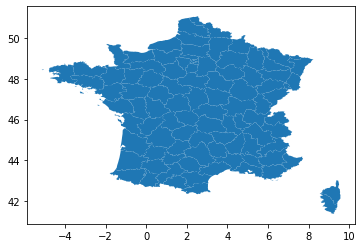

In [37]:
gdf_department.plot()

So what we need at that stage is to merge the different dataframe together.

In [38]:
df = gdf_department.merge(df_department, how='inner', left_on='code', right_on='Department code')

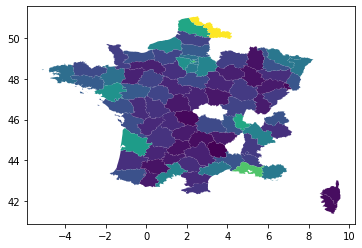

In [39]:
df.plot(column='Registered')

## 5. Bug correction

In [40]:
def prepend_zero(code):
    if len(code) == 1:
        return '0' + code
    return code

df_department['Department code'] = df_department['Department code'].apply(prepend_zero)

In [41]:
df = gdf_department.merge(df_department, how='inner', left_on='code', right_on='Department code')

In [45]:
df.head()

,code,nom,geometry,Department code,Department name,Town code,Registered,Abstentions,Null,Choice A,Choice B
0,02,Aisne,"POLYGON ((3.172704445659 50.011996744997, 3.18...",02,AISNE,340904,376068,72928,5196,120916,177028
1,10,Aube,"POLYGON ((3.4147888224632 48.390268550005, 3.4...",10,AUBE,96568,203590,37939,3466,54743,107442
2,14,Calvados,"POLYGON ((-1.1196198636379 49.355568981262, -1...",14,CALVADOS,270982,490547,82498,6617,176764,224668
3,15,Cantal,"POLYGON ((2.5084125130653 45.478501516921, 2.5...",15,CANTAL,35148,120962,20366,2190,42528,55878
4,28,Eure-et-Loir,"POLYGON ((0.8148247207739 48.670163564137, 0.8...",28,EURE ET LOIR,85380,297784,56589,4380,90386,146429


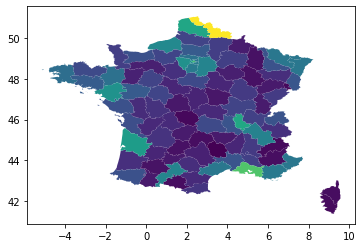

In [42]:
df.plot(column='Registered')

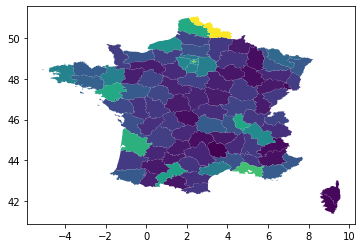

In [43]:
df.plot(column='Choice A')

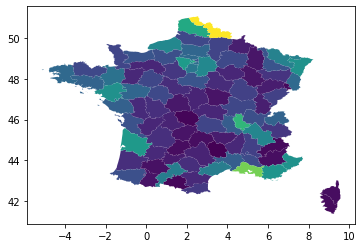

In [44]:
df.plot(column='Choice B')

In [46]:
df_normalized = df.copy()

In [47]:
df_normalized['Choice A'] /= df[['Choice A', 'Choice B']].sum(axis=1)
df_normalized['Choice B'] /= df[['Choice A', 'Choice B']].sum(axis=1)

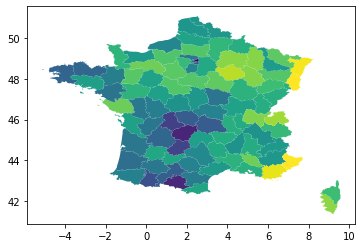

In [48]:
df_normalized.plot(column='Choice B')

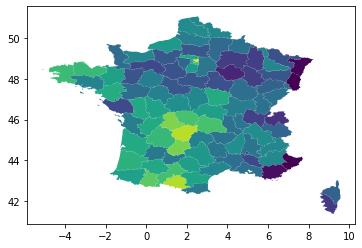

In [49]:
df_normalized.plot(column='Choice A')

## 6. This your turn

The goal will be to repeat the analysis but at the region scale. However, this is not as easy. The regions information in directly available and we will need to import it from another external source.

* Open the `data/referendum.csv` file.

In [53]:
# %load solutions/24_solutions.py
df_referendum = pd.read_csv(filename_referendum, sep=';')


* Show the 5 first rows.

In [54]:
# %load solutions/25_solutions.py
df_referendum.head()


,Department code,Department name,Town code,Town name,Registered,Abstentions,Null,Choice A,Choice B
0,1,AIN,1,L'Abergement-Clémenciat,592,84,9,154,345
1,1,AIN,2,L'Abergement-de-Varey,215,36,5,66,108
2,1,AIN,4,Ambérieu-en-Bugey,8205,1698,126,2717,3664
3,1,AIN,5,Ambérieux-en-Dombes,1152,170,18,280,684
4,1,AIN,6,Ambléon,105,17,1,35,52


As you can see, there is no information about the regions. Before to get to this stage, let's correct the issue with the deparment numbering.

In [56]:
# %load solutions/26_solutions.py
df_referendum['Department code'] = df_referendum['Department code'].apply(
    lambda x: '0' + x if len(x) == 1 else x
)
df_referendum.head()


,Department code,Department name,Town code,Town name,Registered,Abstentions,Null,Choice A,Choice B
0,01,AIN,1,L'Abergement-Clémenciat,592,84,9,154,345
1,01,AIN,2,L'Abergement-de-Varey,215,36,5,66,108
2,01,AIN,4,Ambérieu-en-Bugey,8205,1698,126,2717,3664
3,01,AIN,5,Ambérieux-en-Dombes,1152,170,18,280,684
4,01,AIN,6,Ambléon,105,17,1,35,52


* Load the information related to the regions from the file `data/regions.csv`. Show the 5 first rows.

In [58]:
# %load solutions/27_solutions.py
df_regions = pd.read_csv(os.path.join('data', 'regions.csv'))
df_regions.head()


,id,code,name,slug
0,1,01,Guadeloupe,guadeloupe
1,2,02,Martinique,martinique
2,3,03,Guyane,guyane
3,4,04,La Réunion,la reunion
4,5,06,Mayotte,mayotte


* Lead the information related to the departments from the file `data/departments.csv`. Show the 5 first rows.

In [60]:
# %load solutions/28_solutions.py
df_departments = pd.read_csv(os.path.join('data', 'departments.csv'))
df_departments.head()


,id,region_code,code,name,slug
0,1,84,01,Ain,ain
1,2,32,02,Aisne,aisne
2,3,84,03,Allier,allier
3,4,93,04,Alpes-de-Haute-Provence,alpes de haute provence
4,5,93,05,Hautes-Alpes,hautes alpes


* Find the column in the departments dataframe which is related to the `code` column of the regions dataframe. Merge both dataframe using these informations. Show the 5 first rows of the resulting dataframe.

In [62]:
# %load solutions/29_solutions.py
# pd.merge(df_departments, df_regions, how='inner', left_on='region_code', right_on='code')
df_reg_dep = df_departments.merge(df_regions, how='inner', left_on='region_code', right_on='code')
df_reg_dep.head()


,id_x,region_code,code_x,name_x,slug_x,id_y,code_y,name_y,slug_y
0,1,84,01,Ain,ain,16,84,Auvergne-Rhône-Alpes,auvergne rhone alpes
1,3,84,03,Allier,allier,16,84,Auvergne-Rhône-Alpes,auvergne rhone alpes
2,7,84,07,Ardèche,ardeche,16,84,Auvergne-Rhône-Alpes,auvergne rhone alpes
3,15,84,15,Cantal,cantal,16,84,Auvergne-Rhône-Alpes,auvergne rhone alpes
4,25,84,26,Drôme,drome,16,84,Auvergne-Rhône-Alpes,auvergne rhone alpes


* In the previous dataframe as column linked to the department code which could be merged with our referendum data as we did previously. Since we already got information about the regions, we can get the regions dataframe with a new merge. Show the 5 first rows of the merged dataframe.

In [64]:
# %load solutions/30_solutions.py
df = df_referendum.merge(df_reg_dep, how='inner', left_on='Department code', right_on='code_x')
df.head()


,Department code,Department name,Town code,Town name,Registered,Abstentions,Null,Choice A,Choice B,id_x,region_code,code_x,name_x,slug_x,id_y,code_y,name_y,slug_y
0,01,AIN,1,L'Abergement-Clémenciat,592,84,9,154,345,1,84,01,Ain,ain,16,84,Auvergne-Rhône-Alpes,auvergne rhone alpes
1,01,AIN,2,L'Abergement-de-Varey,215,36,5,66,108,1,84,01,Ain,ain,16,84,Auvergne-Rhône-Alpes,auvergne rhone alpes
2,01,AIN,4,Ambérieu-en-Bugey,8205,1698,126,2717,3664,1,84,01,Ain,ain,16,84,Auvergne-Rhône-Alpes,auvergne rhone alpes
3,01,AIN,5,Ambérieux-en-Dombes,1152,170,18,280,684,1,84,01,Ain,ain,16,84,Auvergne-Rhône-Alpes,auvergne rhone alpes
4,01,AIN,6,Ambléon,105,17,1,35,52,1,84,01,Ain,ain,16,84,Auvergne-Rhône-Alpes,auvergne rhone alpes


* Group and add up the vote by region and show the resulting dataframe.

In [66]:
# %load solutions/31_solutions.py
regions_vote = df.groupby(['code_y', 'name_y']).sum()
regions_vote


,,Town code,Registered,Abstentions,Null,Choice A,Choice B,id_x,id_y
code_y,name_y,,,,,,,,
11,Île-de-France,362162,6942361,1515884,85997,2536620,2803860,108231,7686
24,Centre-Val de Loire,299535,1801366,326560,28827,590890,855089,63325,12887
27,Bourgogne-Franche-Comté,1095634,1997925,358321,33671,668246,937687,198727,30648
28,Normandie,1115294,2372779,426075,35513,816972,1094219,146683,29079
32,Hauts-de-France,1533397,4210444,866555,60601,1411257,1872031,202632,38360
44,Grand Est,1502456,3857089,783348,56951,1088684,1928106,273846,57101
52,Pays de la Loire,245308,2605438,412509,47677,922468,1222784,93816,18024
53,Bretagne,214573,2380594,364724,36077,944052,1035741,43342,16510
75,Nouvelle-Aquitaine,968048,4201774,711017,71629,1641249,1777879,187854,63070


* Taking example on the previous case, plot the vote for the "choice A" and "choice B". Use the file `regions.geojson` instead of `departments.geojson`.

In [68]:
# %load solutions/32_solutions.py
gdf_regions = gpd.read_file(os.path.join('data', 'regions.geojson'))
gdf_regions = gdf_regions.merge(regions_vote, how='inner', left_on='code', right_on='code_y')

gdf_normalized = gdf_regions.copy()
gdf_normalized['Choice A'] /= gdf_regions[['Choice A', 'Choice B']].sum(axis=1)
gdf_normalized['Choice B'] /= gdf_regions[['Choice A', 'Choice B']].sum(axis=1)


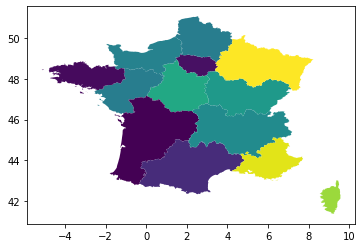

In [70]:
# %load solutions/33_solutions.py
gdf_normalized.plot(column='Choice B')


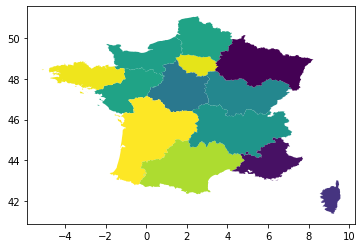

In [72]:
# %load solutions/34_solutions.py
gdf_normalized.plot(column='Choice A')
